In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
#from sklearn.preprocessing import MinMaxScaler import numpy as np \
# Sample data data = np.array([[1], [2], [3], [4], [5]]) # Initialize the scaler scaler = MinMaxScaler() # Fit
# use inverse scaler in the end


In [4]:
#Loading data from file
bike_df = pd.read_csv(r'C:\Users\Manoj Kumar Panicker\python Again\Files\day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking for null values in data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Dropping Insignificant columns
bike_df=bike_df.drop(['instant','dteday','casual','registered'],axis=1)

In [7]:
# Mapping weathersit and season columns with string values, so that we can create dummy variables

In [8]:
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear',2:'Mist',3:'Light_Snow_Rain',4:'Heavy_rain'})
bike_df['season']= bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['mnth'] = bike_df['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_df['weekday'] = bike_df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thr',5:'Fri',6:'Sat'})


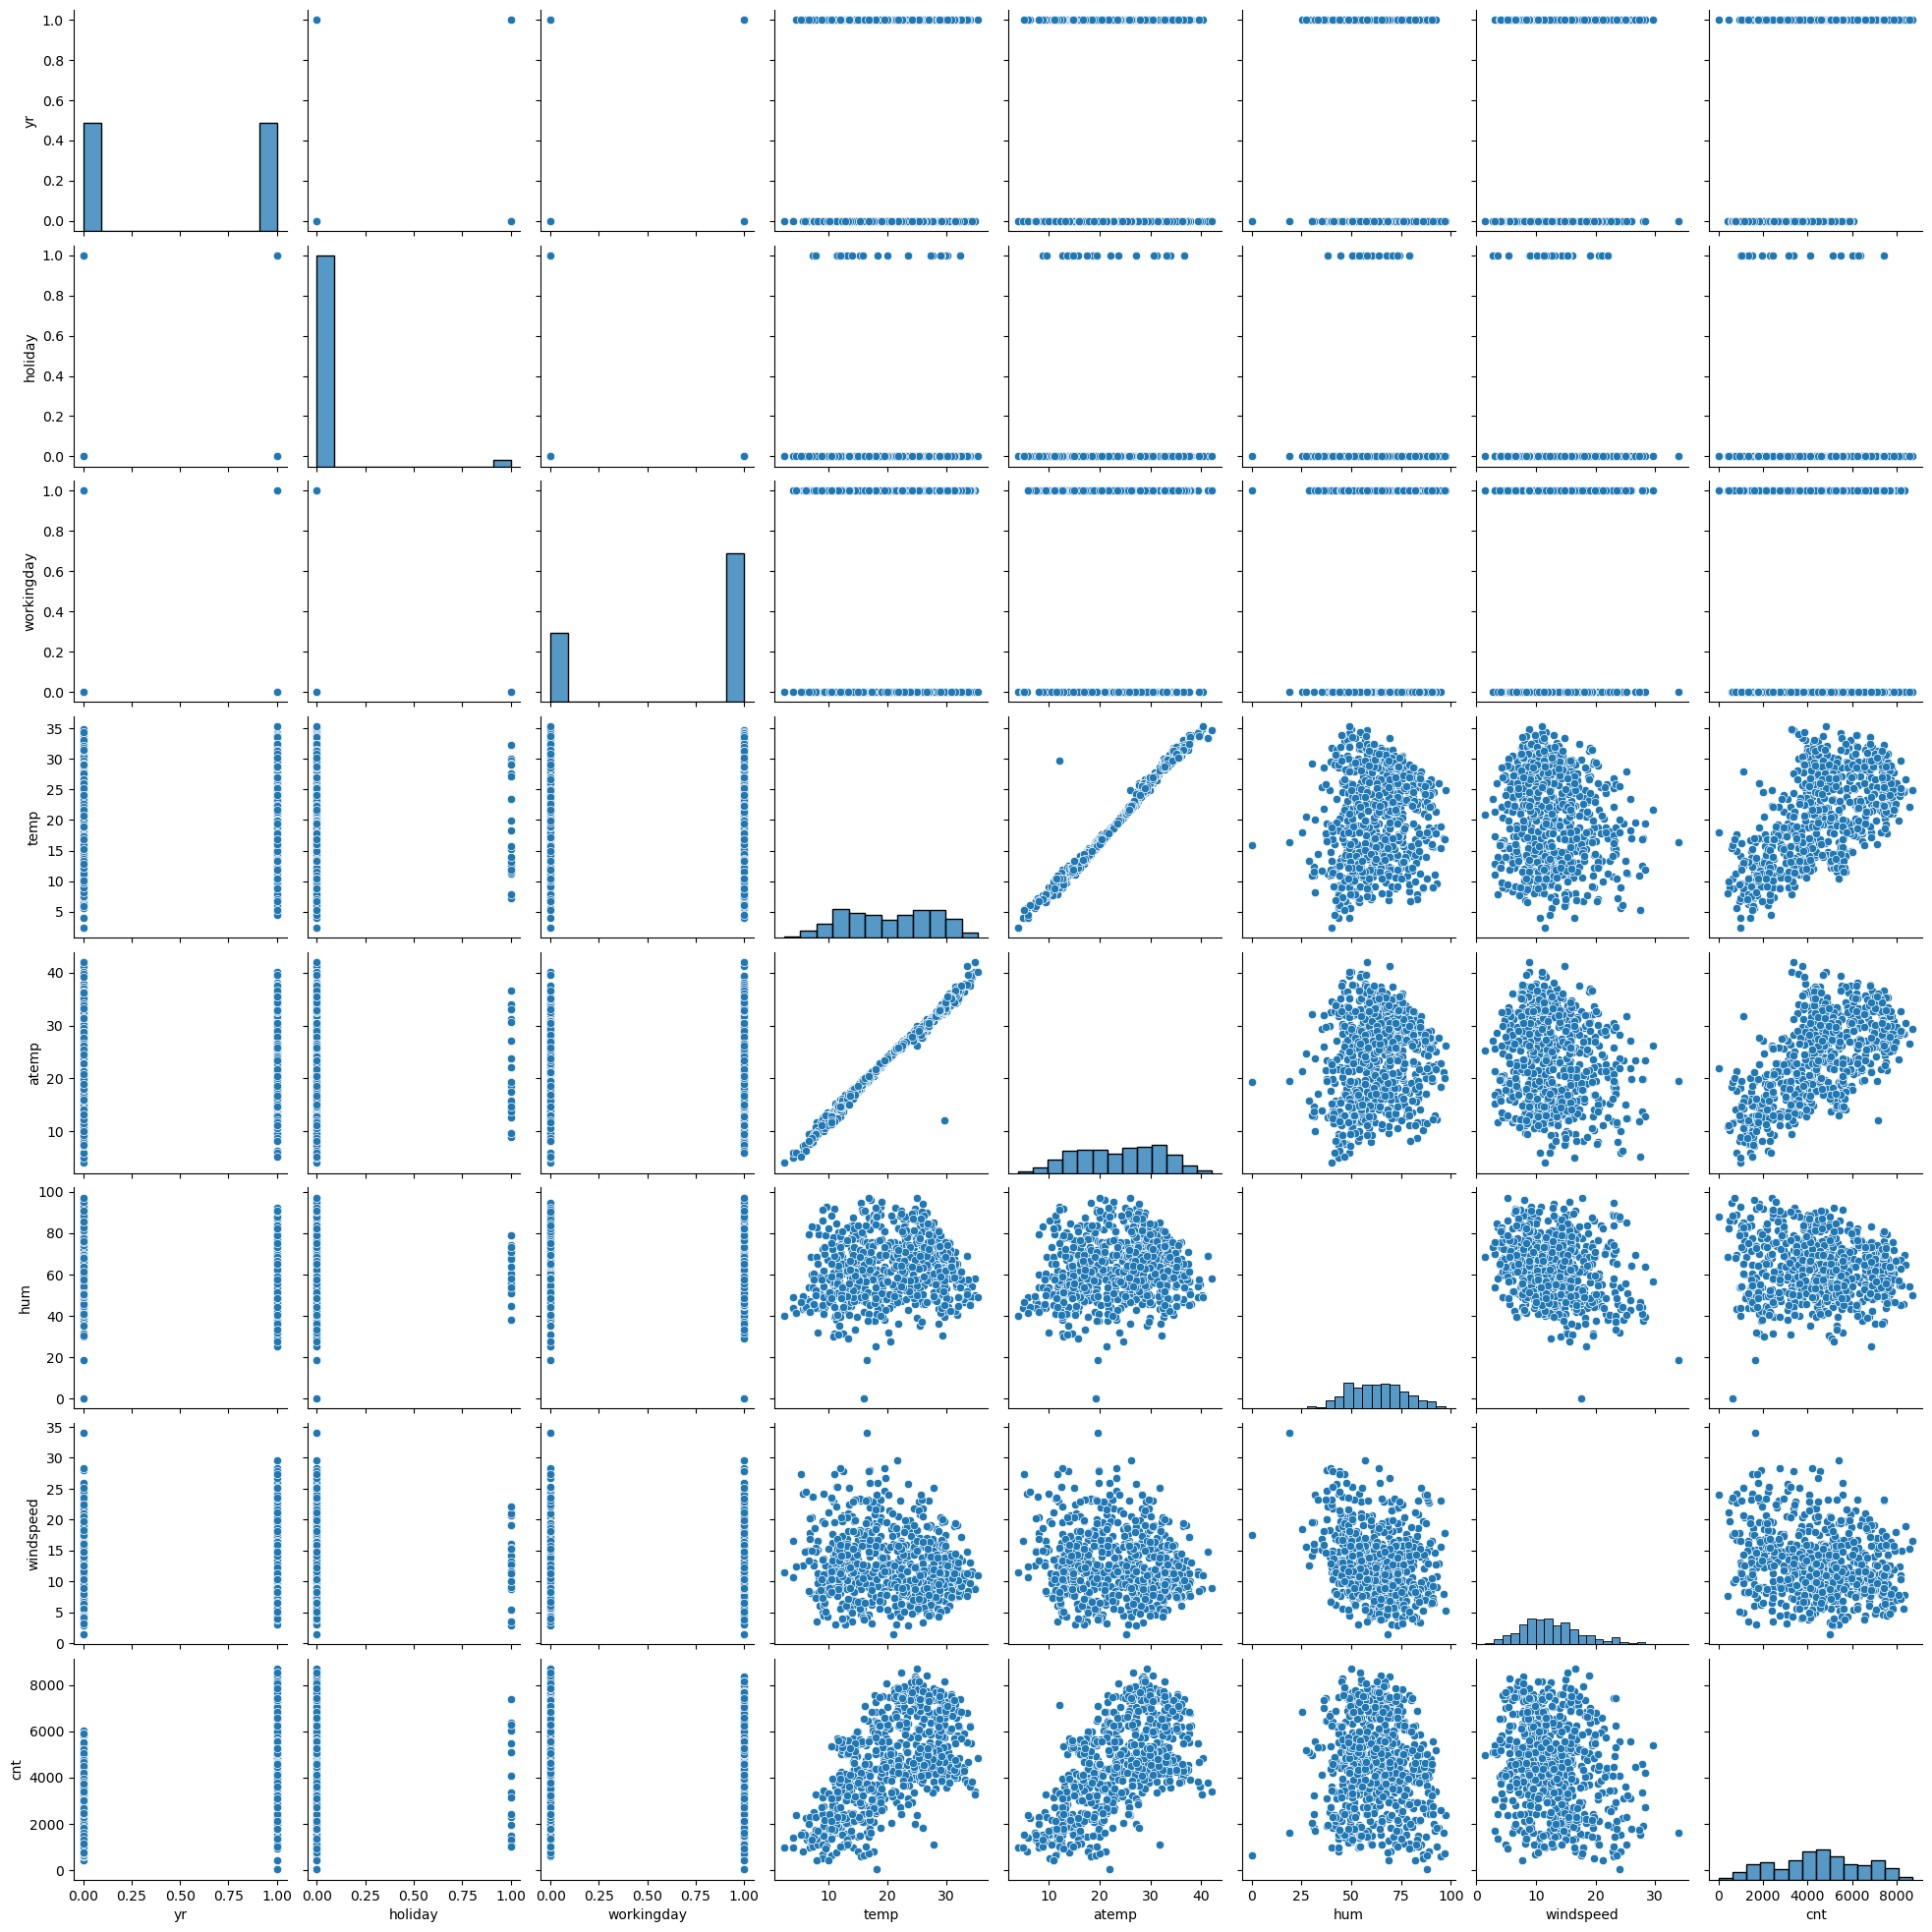

In [410]:
sns.pairplot(bike_df)
plt.show()

# from above chart we can see that cnt is positively correlated with temp and atemp

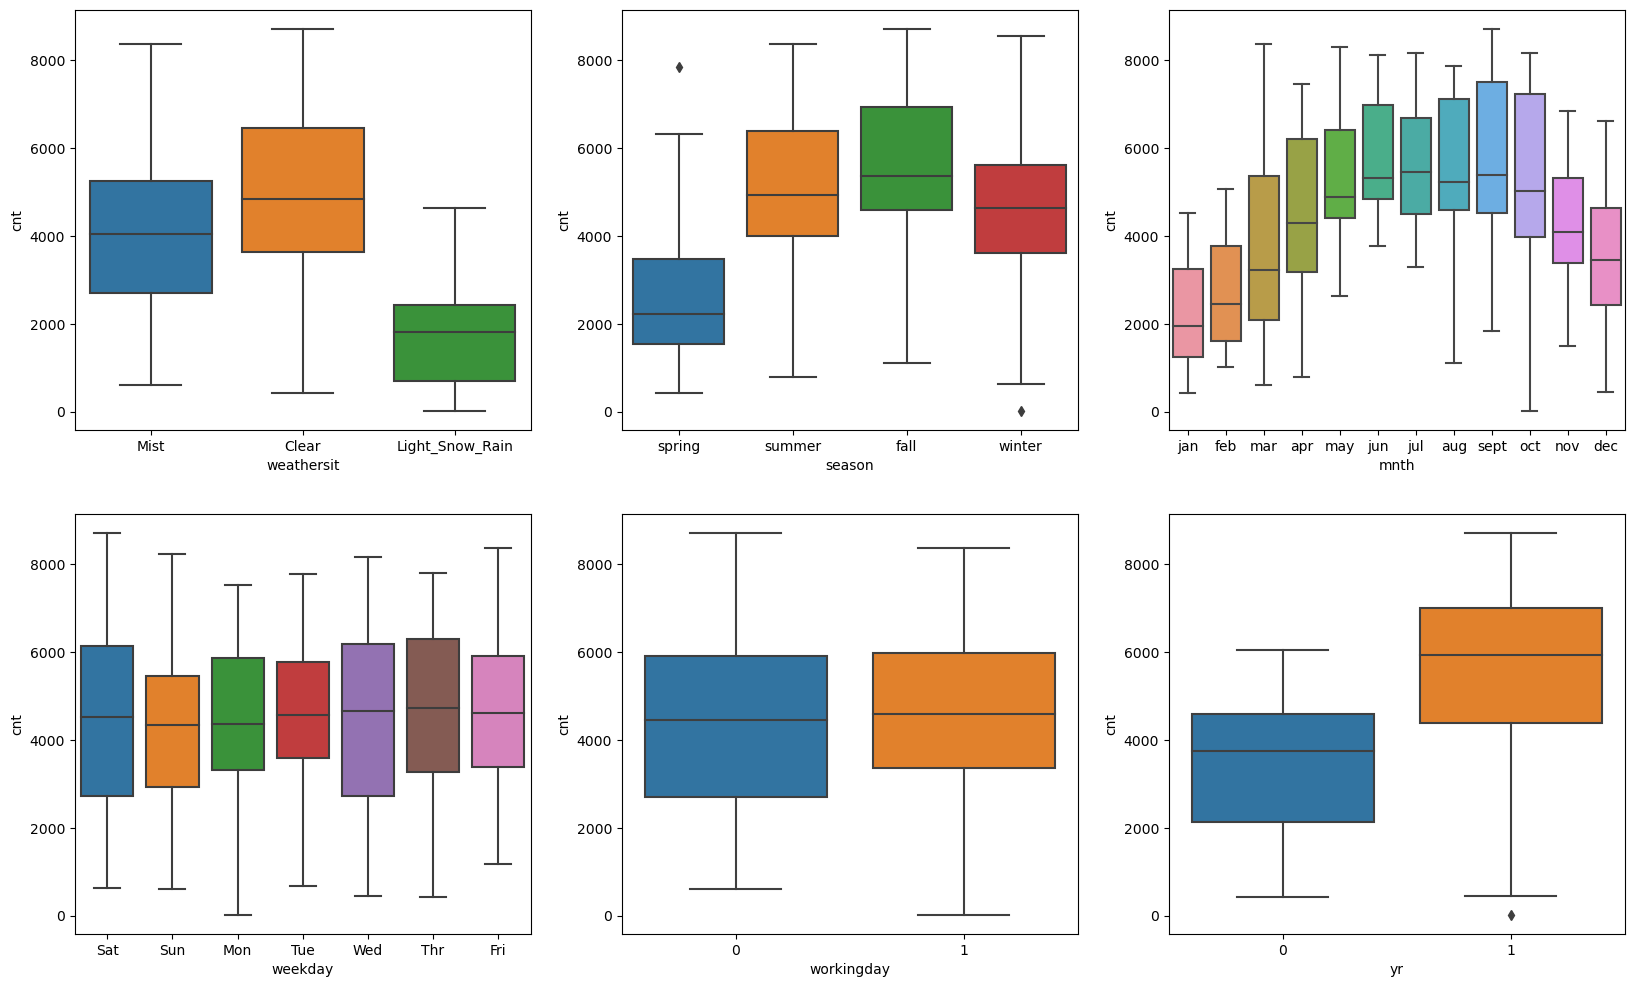

In [9]:
# Checking if there are outliers in amount columns
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(data=bike_df, x='weathersit', y='cnt')
plt.subplot(2,3,2)
sns.boxplot(data=bike_df, x='season', y='cnt')
plt.subplot(2,3,3)
sns.boxplot(data=bike_df, x='mnth', y='cnt')
plt.subplot(2,3,4)
sns.boxplot(data=bike_df, x='weekday', y='cnt')
plt.subplot(2,3,5)
sns.boxplot(data=bike_df, x='workingday', y='cnt')
plt.subplot(2,3,6)
sns.boxplot(data=bike_df, x='yr', y='cnt')
plt.show()

# demand is high when weather condition is clear seasion is fall

In [10]:
# creating dummy variables from weathersit,season,weekday,mnth dropping one unneccesory column
weather_cond = pd.get_dummies(bike_df['weathersit'],drop_first=True)
# creating dummy variable for season and dropping winter as this one has least count of rows.
season = pd.get_dummies(bike_df['season'],drop_first=True)
# Creating Dummy variable for weekday
weekday = pd.get_dummies(bike_df['weekday'],drop_first=True)
# creating dummy variable for month
mnth = pd.get_dummies(bike_df['mnth'],drop_first=True)

In [11]:

# Merging dummy variables with bike_df dataframe
bike_df = pd.concat([bike_df,weather_cond],axis=1)

bike_df = pd.concat([bike_df,season],axis=1)

bike_df = pd.concat([bike_df,weekday],axis=1)

bike_df = pd.concat([bike_df,mnth],axis=1)


In [12]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'Light_Snow_Rain', 'Mist', 'spring', 'summer', 'winter', 'Mon', 'Sat',
       'Sun', 'Thr', 'Tue', 'Wed', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sept'],
      dtype='object')

In [13]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,spring,0,jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,False,False,True,False,False,False,False,False,False,False
1,spring,0,jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,False,False,True,False,False,False,False,False,False,False
2,spring,0,jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,True,False,False,False,False,False,False,False
3,spring,0,jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,True,False,False,False,False,False,False,False
4,spring,0,jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,True,False,False,False,False,False,False,False


In [14]:
# now dropping actual weathersit and season columns as they can be defined by dummy variables. handling multicollinearity 
bike_df=bike_df.drop(['weathersit','season','mnth','weekday'],axis=1)

# Dividing dataset into train and test data. train data is for modle building and test is for model testing

In [15]:
train_df, test_df = train_test_split(bike_df,train_size =0.7,random_state=70)
print(train_df.shape)
print(test_df.shape)

(510, 30)
(220, 30)


In [16]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Snow_Rain,Mist,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,True,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,True,...,False,False,True,False,False,False,False,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,True,False,False,False,False,False,False,False


In [19]:
# Creating list of numeric variables on which we are going to perform minmax scaler
num_var= ['atemp','temp','hum','windspeed','cnt']

In [20]:
# MinMaxScaler() is to bring all numeric values on same scale between 0,1
scaler = MinMaxScaler()

In [21]:
# using scaler object (created using MinMaxScaler()) to fit and transform the data set
train_df[num_var] = scaler.fit_transform(train_df[num_var])
train_df[num_var].head()

,atemp,temp,hum,windspeed,cnt
692,0.233759,0.273137,0.416024,0.730778,0.259434
127,0.606003,0.584649,0.649529,0.107707,0.495973
133,0.580786,0.575304,0.948586,0.232045,0.389669
524,0.784325,0.812053,0.449443,0.251294,0.860101
209,0.973898,0.970925,0.557841,0.312833,0.439945


In [422]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 692 to 334
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   cnt              510 non-null    float64
 8   Light_Snow_Rain  510 non-null    bool   
 9   Mist             510 non-null    bool   
 10  spring           510 non-null    bool   
 11  summer           510 non-null    bool   
 12  winter           510 non-null    bool   
 13  Mon              510 non-null    bool   
 14  Sat              510 non-null    bool   
 15  Sun              510 non-null    bool   
 16  Thr              510 non-null    bool   
 17  Tue              51

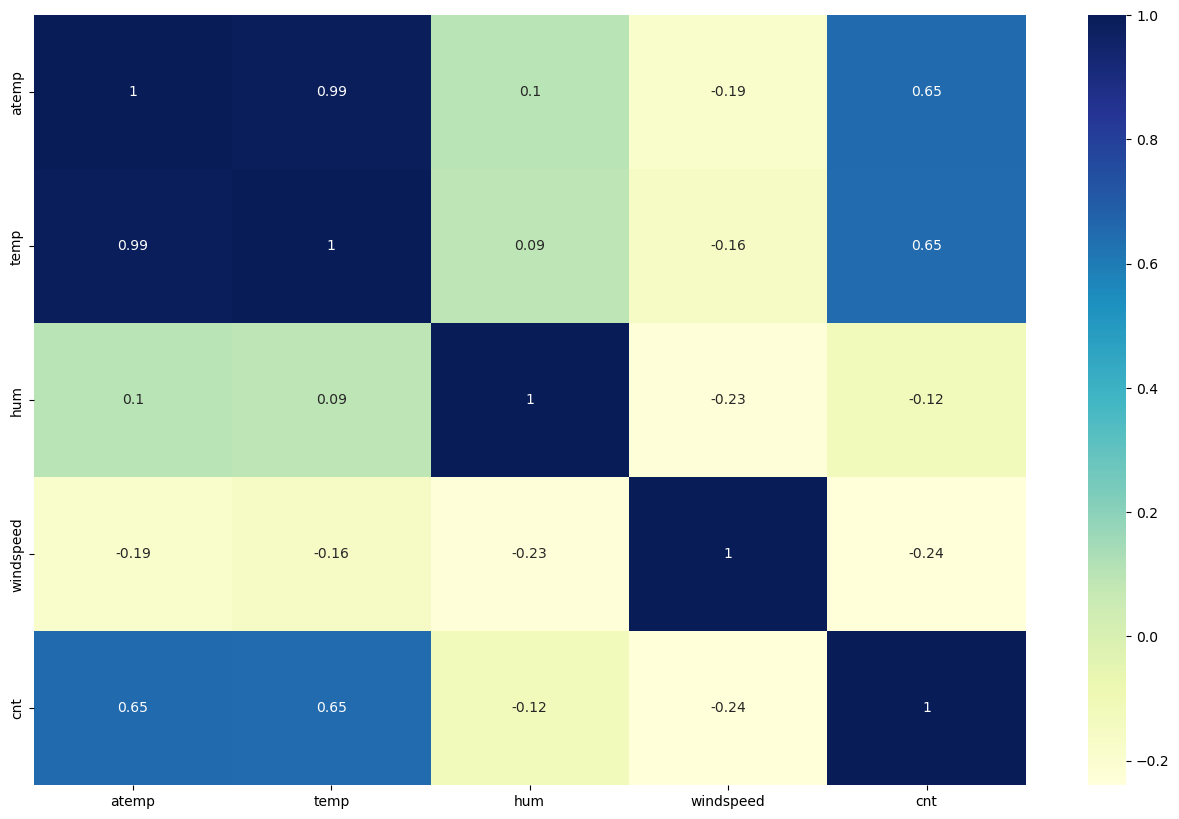

In [352]:
# Checking Correlations
plt.figure(figsize=(16,10))
sns.heatmap(train_df[num_var].corr(),annot=True,cmap ='YlGnBu')
plt.show()

# We can see that temp and atemp are most significant variable as with cnt they have correlation of 0.65


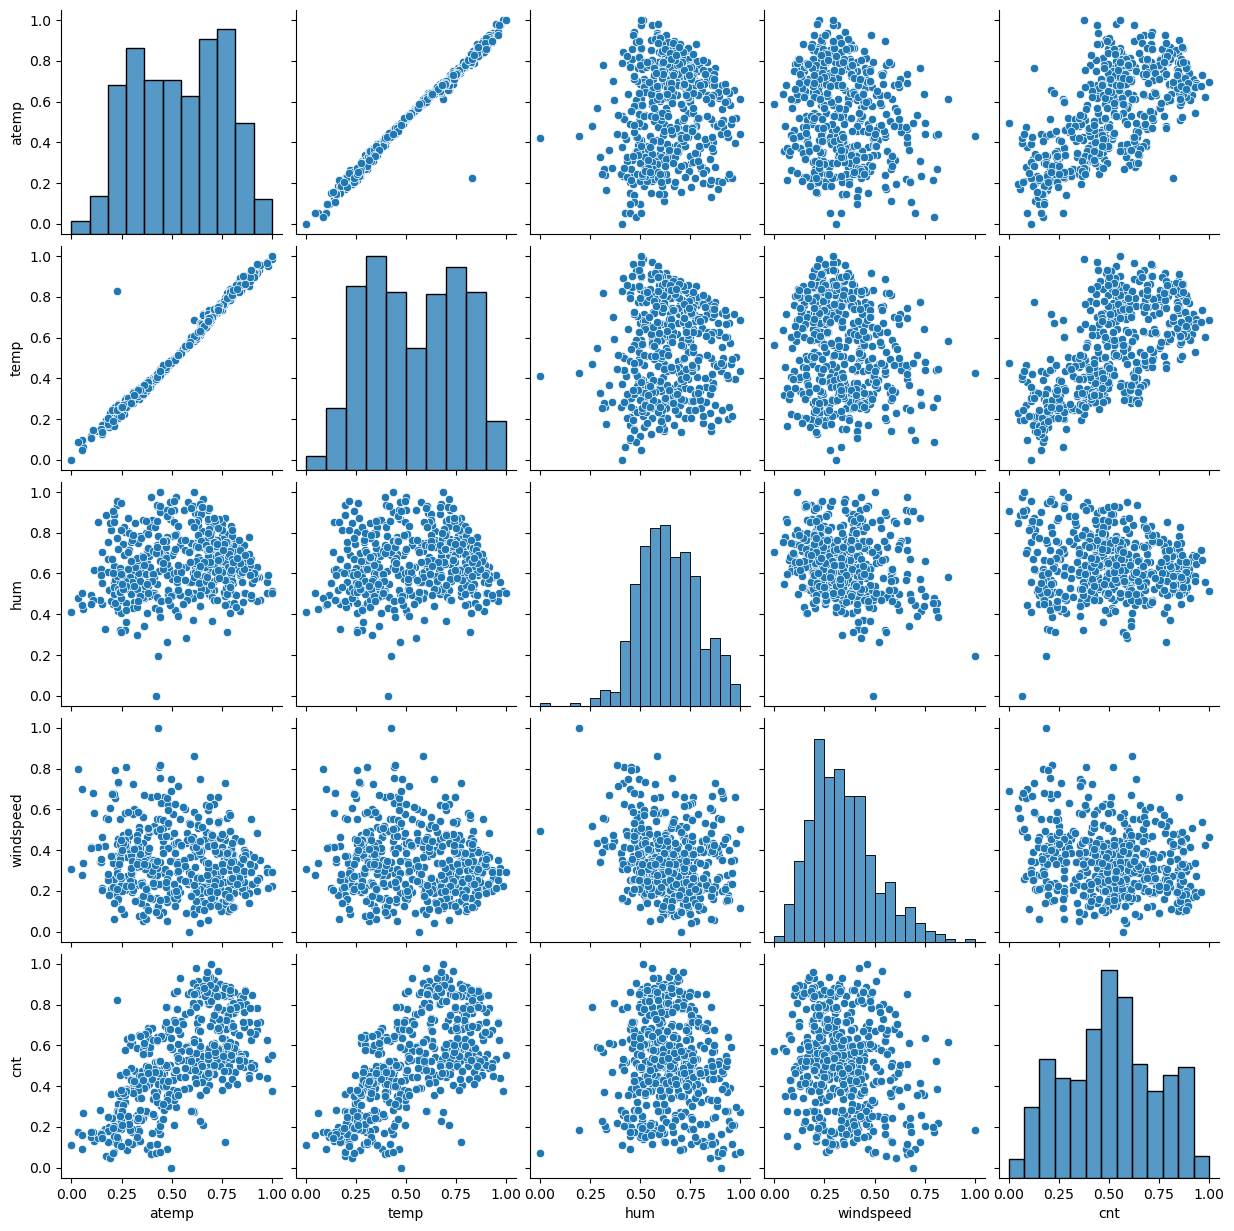

In [353]:
sns.pairplot(train_df[num_var])
plt.show()

In [354]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

In [423]:
# Creating y_train and X_train data set which we are going to use in model building
y_train = train_df.pop('cnt')
X_train = train_df

In [424]:
y_train.head()

692    0.259434
127    0.495973
133    0.389669
524    0.860101
209    0.439945
Name: cnt, dtype: float64

In [380]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Clear,Mist,fall,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sept
692,1,0,0,0.273137,0.233759,0.416024,0.730778,True,False,False,...,False,False,False,False,False,False,False,True,False,False
127,0,0,0,0.584649,0.606003,0.649529,0.107707,True,False,False,...,False,False,False,False,False,False,True,False,False,False
133,0,0,0,0.575304,0.580786,0.948586,0.232045,False,True,False,...,False,False,False,False,False,False,True,False,False,False
524,1,0,0,0.812053,0.784325,0.449443,0.251294,True,False,False,...,False,False,False,False,True,False,False,False,False,False
209,0,0,1,0.970925,0.973898,0.557841,0.312833,True,False,True,...,False,False,False,True,False,False,False,False,False,False


# There are too many features, lets use RFE to cut down features

In [511]:
lnr_mdl = LinearRegression()
lnr_mdl.fit(X_train,y_train)

rfe = RFE(lnr_mdl, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [512]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('Mist', False, 3),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 7),
 ('Sun', False, 14),
 ('Thr', False, 20),
 ('Tue', False, 18),
 ('Wed', False, 19),
 ('aug', False, 12),
 ('dec', False, 2),
 ('feb', False, 17),
 ('jan', False, 16),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 8),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sept', False, 4)]

In [513]:
# getting all columns supported for model 
support_col = X_train.columns[rfe.support_]
support_col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Light_Snow_Rain', 'spring',
       'winter', 'jul', 'nov'],
      dtype='object')

In [514]:
# RFE says that below columns are not usefull for model
X_train_insignificant = list(X_train.columns[~rfe.support_])
print(X_train_insignificant)

['holiday', 'workingday', 'Mist', 'summer', 'Mon', 'Sat', 'Sun', 'Thr', 'Tue', 'Wed', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'oct', 'sept']


In [515]:
X = X_train[support_col]
# Adding Constant to the train data set
X_train_sm = sm.add_constant(X)
# Finding best fit line by minimizing the error (distance between point and best fit line). Square of distance or error
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()
# fit the model to get important factors like r-square, coeficient, pvalue etc.
#lnr_mdl = lnr_mdl.fit()
lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.7
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.40e-179
Time:                        23:06:25   Log-Likelihood:                 469.92
No. Observations:                 510   AIC:                            -917.8
Df Residuals:                     499   BIC:                            -871.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3909      0.033     11.719      0.000       0.325       0.456
yr                  0.2224      0.009     25.357      0.000       0.205       0.240
temp                0.3097      0.138      2.244      0.025       0.039       0.581
atemp               0.1963      0.139      1.411      0.159      -0.077       0.470
hum                -0.2719      0.033     -8.321      0.000      -0.336      -0.208
windspeed          -0.1602      0.029     -5.450      0.000      -0.218      -0.102
Light_Snow_Rain    -0.1827      0.026     -7.012      0.000      -0.234      -0.131
spring             -0.1288      0.016     -8.045      0.000      -0.160      -0.097
winter              0.0642      0.014      4.433      0.000       0.036       0.093
jul                -0.0858      0.018     -4.783      0.000      -0.121      -0.051
nov                -0.0555      0.019     -2.878      0.004      -0.093      -0.018
==============================================================================
Omnibus:                       71.888   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.144
Skew:                          -0.827   Prob(JB):                     1.22e-29
Kurtosis:                       4.878   Cond. No.                         72.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# now perform VIF to check columns significance

# we remove High p-value and low VIF cases first becuse VIF may change after removing high p-value variables.

In [280]:
# now perform VIF to check columns significance
X.shape[1]

34

In [516]:
 # adding all columns in Features field
 # adding VIF value 
 # getting value till two decimal point
 # Sorting the resulting datafram

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,350.92
1,temp,350.59
3,hum,14.31
4,windspeed,4.93
6,spring,2.52
7,winter,2.38
0,yr,2.04
9,nov,1.54
8,jul,1.39
5,Light_Snow_Rain,1.17


In [517]:
# dropping atemp as pvalue is 0.903 and vif is 368 both are high
X = X.drop(['atemp'],axis=1)
# Adding Constant to the train data set
X_train_sm = sm.add_constant(X)
# Finding best fit line by minimizing the error (distance between point and best fit line). Square of distance or error
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.5
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          2.30e-180
Time:                        23:06:38   Log-Likelihood:                 468.90
No. Observations:                 510   AIC:                            -917.8
Df Residuals:                     500   BIC:                            -875.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3955      0.033     11.900      0.000       0.330       0.461
yr                  0.2224      0.009     25.335      0.000       0.205       0.240
temp                0.4992      0.032     15.548      0.000       0.436       0.562
hum                -0.2700      0.033     -8.262      0.000      -0.334      -0.206
windspeed          -0.1669      0.029     -5.751      0.000      -0.224      -0.110
Light_Snow_Rain    -0.1849      0.026     -7.104      0.000      -0.236      -0.134
spring             -0.1290      0.016     -8.047      0.000      -0.160      -0.098
winter              0.0658      0.014      4.551      0.000       0.037       0.094
jul                -0.0859      0.018     -4.786      0.000      -0.121      -0.051
nov                -0.0559      0.019     -2.893      0.004      -0.094      -0.018
==============================================================================
Omnibus:                       69.214   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.586
Skew:                          -0.805   Prob(JB):                     3.25e-28
Kurtosis:                       4.834   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
 # adding all columns in Features field
 # adding VIF value 
 # getting value till two decimal point
 # Sorting the resulting datafram

vif = pd.DataFrame()
vif['Features'] = X.columns # adding all columns in Features field
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])] # adding VIF value 
vif['VIF'] = round(vif['VIF'],2) # getting value till two decimal point
vif = vif.sort_values(by='VIF',ascending=False) # Sorting the resulting dataframe
vif

,Features,VIF
2,hum,14.04
1,temp,12.61
3,windspeed,4.85
5,spring,2.52
6,winter,2.35
0,yr,2.04
8,nov,1.54
7,jul,1.39
4,Light_Snow_Rain,1.17


In [519]:
# dropping hum column as it has high vif
X = X.drop(['hum'],axis=1)
# adding constant
X_train_sm = sm.add_constant(X)
# Finding best fit line by minimizing the error (distance between point and best fit line). Square of distance or error
# fit the model to get important factors like r-square, coeficient, pvalue etc.
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          9.99e-168
Time:                        23:06:54   Log-Likelihood:                 436.27
No. Observations:                 510   AIC:                            -854.5
Df Residuals:                     501   BIC:                            -816.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2145      0.027      8.059      0.000       0.162       0.267
yr                  0.2290      0.009     24.592      0.000       0.211       0.247
temp                0.4712      0.034     13.857      0.000       0.404       0.538
windspeed          -0.1017      0.030     -3.420      0.001      -0.160      -0.043
Light_Snow_Rain    -0.2533      0.026     -9.639      0.000      -0.305      -0.202
spring             -0.1295      0.017     -7.585      0.000      -0.163      -0.096
winter              0.0519      0.015      3.393      0.001       0.022       0.082
jul                -0.0628      0.019     -3.328      0.001      -0.100      -0.026
nov                -0.0415      0.020     -2.027      0.043      -0.082      -0.001
==============================================================================
Omnibus:                       73.823   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.745
Skew:                          -0.862   Prob(JB):                     2.47e-29
Kurtosis:                       4.796   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [520]:
 # adding all columns in Features field
 # adding VIF value 
 # getting value till two decimal point
 # Sorting the resulting datafram

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.80
1,temp,4.64
0,yr,2.04
5,winter,1.85
4,spring,1.71
7,nov,1.54
6,jul,1.32
3,Light_Snow_Rain,1.09


# now lest start dropping columns having high pvalue and low VIF

In [523]:
# Dropping nov as it has high pvalue and low VIF
X = X.drop('nov',axis=1)
# Adding Constant to the train data set
X_train_sm = sm.add_constant(X)
# Finding best fit line by minimizing the error (distance between point and best fit line). Square of distance or error
# fit the model to get important factors like r-square, coeficient, pvalue etc.
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          4.44e-168
Time:                        23:08:50   Log-Likelihood:                 434.19
No. Observations:                 510   AIC:                            -852.4
Df Residuals:                     502   BIC:                            -818.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2090      0.027      7.867      0.000       0.157       0.261
yr                  0.2282      0.009     24.452      0.000       0.210       0.246
temp                0.4817      0.034     14.293      0.000       0.416       0.548
windspeed          -0.1053      0.030     -3.534      0.000      -0.164      -0.047
Light_Snow_Rain    -0.2489      0.026     -9.475      0.000      -0.301      -0.197
spring             -0.1254      0.017     -7.375      0.000      -0.159      -0.092
winter              0.0401      0.014      2.826      0.005       0.012       0.068
jul                -0.0651      0.019     -3.444      0.001      -0.102      -0.028
==============================================================================
Omnibus:                       69.231   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.859
Skew:                          -0.827   Prob(JB):                     9.40e-27
Kurtosis:                       4.703   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [524]:
 # adding all columns in Features field
 # adding VIF value 
 # getting value till two decimal point
 # Sorting the resulting datafram

vif = pd.DataFrame()
vif['Features'] = X.columns # adding all columns in Features field
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])] # adding VIF value
vif['VIF'] = round(vif['VIF'],2) # getting value till two decimal point
vif = vif.sort_values(by='VIF',ascending=False) # Sorting the resulting dataframe
vif

,Features,VIF
2,windspeed,4.74
1,temp,4.56
0,yr,2.03
4,spring,1.70
5,winter,1.35
6,jul,1.32
3,Light_Snow_Rain,1.08


# Dropping winter as it has negetive and small coefficent 

In [528]:


X = X.drop('winter',axis=1)
# Adding Constant to the train data set
X_train_sm = sm.add_constant(X)
# Finding best fit line by minimizing the error (distance between point and best fit line). Square of distance or error
# fit the model to get important factors like r-square, coeficient, pvalue etc.
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     318.1
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.24e-167
Time:                        23:12:01   Log-Likelihood:                 430.16
No. Observations:                 510   AIC:                            -846.3
Df Residuals:                     503   BIC:                            -816.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2558      0.021     12.246      0.000       0.215       0.297
yr                  0.2303      0.009     24.589      0.000       0.212       0.249
temp                0.4303      0.029     15.062      0.000       0.374       0.486
windspeed          -0.1158      0.030     -3.891      0.000      -0.174      -0.057
Light_Snow_Rain    -0.2450      0.026     -9.275      0.000      -0.297      -0.193
spring             -0.1541      0.014    -11.199      0.000      -0.181      -0.127
jul                -0.0656      0.019     -3.446      0.001      -0.103      -0.028
==============================================================================
Omnibus:                       59.069   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.562
Skew:                          -0.762   Prob(JB):                     7.95e-21
Kurtosis:                       4.425   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [529]:
 # adding all columns in Features field
 # adding VIF value 
 # getting value till two decimal point
 # Sorting the resulting datafram

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,4.56
2,windspeed,4.47
0,yr,1.98
4,spring,1.58
5,jul,1.30
3,Light_Snow_Rain,1.08


# Dropping jul as it has negetive and small coefficent 

In [530]:

X = X.drop(['jul'],axis=1)
# Adding Constant to the train data set
X_train_sm = sm.add_constant(X)
# Finding best fit line by minimizing the error (distance between point and best fit line). Square of distance or error
# fit the model to get important factors like r-square, coeficient, pvalue etc.
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     371.4
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          2.14e-166
Time:                        23:12:13   Log-Likelihood:                 424.21
No. Observations:                 510   AIC:                            -836.4
Df Residuals:                     504   BIC:                            -811.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2707      0.021     13.103      0.000       0.230       0.311
yr                  0.2324      0.009     24.603      0.000       0.214       0.251
temp                0.3903      0.026     14.795      0.000       0.338       0.442
windspeed          -0.1098      0.030     -3.655      0.000      -0.169      -0.051
Light_Snow_Rain    -0.2479      0.027     -9.290      0.000      -0.300      -0.195
spring             -0.1603      0.014    -11.629      0.000      -0.187      -0.133
==============================================================================
Omnibus:                       59.354   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.250
Skew:                          -0.760   Prob(JB):                     3.42e-21
Kurtosis:                       4.458   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [531]:
 # adding all columns in Features field
 # adding VIF value 
 # getting value till two decimal point
 # Sorting the resulting dataframe

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.31
1,temp,3.78
0,yr,1.96
4,spring,1.58
3,Light_Snow_Rain,1.08


In [537]:
# getting r2_score for training data set
y_train_pred = lnr_mdl.predict(X_train_sm)
r2_score (y_true = y_train, y_pred=y_train_pred)

0.7865086231942255

In [532]:
X_train_sm.head()

,const,yr,temp,windspeed,Light_Snow_Rain,spring
692,1.0,1,0.273137,0.730778,False,False
127,1.0,0,0.584649,0.107707,False,False
133,1.0,0,0.575304,0.232045,False,False
524,1.0,1,0.812053,0.251294,False,False
209,1.0,0,0.970925,0.312833,False,False


# Step 4: Residual Analysis

In [53]:
# Lets check bell curved shape if mean is 0

In [525]:
# Lets predict y_train using test model and training data set
y_train_pred = lnr_mdl.predict(X_train_sm)

<Axes: ylabel='Density'>

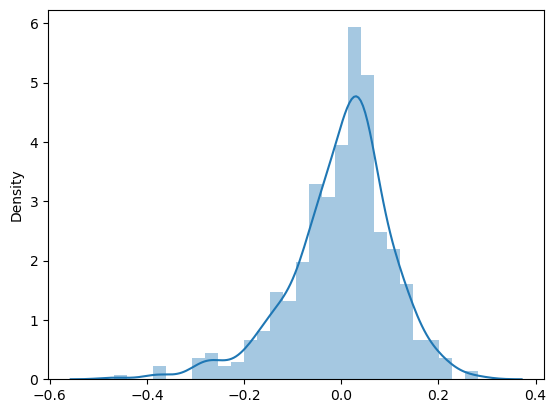

In [526]:
# Finding Residual and ploting it on distribution plot to check bell shape curve and mean 
res = y_train - y_train_pred
sns.distplot(res)

In [95]:
# fit - Train
# transform - Train/ Test
# fit_transform - Train

In [527]:
# transform the test data on the same scale which we have used on training data set
test_df[num_var] = scaler.transform(test_df[num_var])
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.504545,0.018182,0.718182,0.555893,0.559001,0.655745,0.352546,0.531467
std,0.501120,0.133913,0.450911,0.226057,0.225717,0.142493,0.156975,0.209294
min,0.000000,0.000000,0.000000,0.046591,0.027237,0.323051,0.047441,0.047055
25%,0.000000,0.000000,0.000000,0.370745,0.388126,0.539585,0.250034,0.387627
50%,1.000000,0.000000,1.000000,0.571151,0.590783,0.673950,0.330123,0.532329
75%,1.000000,0.000000,1.000000,0.746377,0.731490,0.768745,0.435254,0.705821
max,1.000000,1.000000,1.000000,0.983385,1.049574,0.989717,0.824380,0.951680


In [533]:
# creating y test and x test data set
y_test = test_df.pop('cnt')
# Sequence of column must be same as train data set
X_test = test_df[['yr','temp','windspeed','Light_Snow_Rain','spring']]#,'hum','temp'

In [534]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,temp,windspeed,Light_Snow_Rain,spring
625,1.0,1,0.703024,0.691023,False,False
572,1.0,1,0.900316,0.269239,False,False
201,1.0,0,0.941851,0.411546,False,False
148,1.0,0,0.758058,0.394883,False,False
512,1.0,1,0.814131,0.358977,False,False


In [99]:
#X_test_sm= X_test_sm.drop(['atemp','Clear','Mist','mnth','spring','yr','fall','weekday'],axis=1)


In [100]:
#X_test_sm2 = X_test_sm[['const','registered','workingday','summer','windspeed','temp','hum','holiday']] # ,'temp','hum','holiday'

In [535]:
y_test_pred = lnr_mdl.predict(X_test_sm)

In [536]:
r2_score (y_true = y_test, y_pred=y_test_pred)

0.7764115938918803